# **Pratica 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

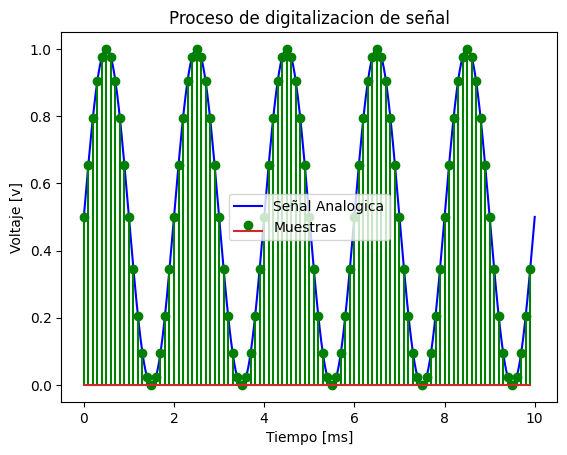

In [ ]:
def simular_senal_analogica(f0, duracion, fs_simulacion):
    t = np.linspace(0, duracion, int(duracion * fs_simulacion))
    senal = 0.5 + 0.5 * np.sin(2*np.pi*f0*t)
    
    return t, senal

def muestrear_senal(t_continuo, senal_continua, fs):
    t_muestreo = np.arange(0,t_continuo[-1], 1/fs)
    sneal_muestreada = np.interp(t_muestreo, t_continuo, senal_continua)
    return t_muestreo, sneal_muestreada

def cuantizar_senal(senal,bits): 
    niveles = 2**bits
    senal_normalizada = senal * 1023/5.0 
    senal_cuantizada = np.round(senal_normalizada)

    return senal_cuantizada * 5.0/1023


def visualizar_proceso():
    f0 = 500
    duracion = 0.01
    fs_simulacion = 100000
    fs_muestreo = 10000
    bits_cuantizacion = 3

    t_continuo, senal_continua = simular_senal_analogica (f0, duracion, fs_simulacion)
    t_muestreo, senal_muestreada = (muestrear_senal(t_continuo, senal_continua, fs_muestreo))
    senal_cuantizada = cuantizar_senal(senal_muestreada, bits_cuantizacion)

    plt.figure()
    plt.plot(t_continuo*1000, senal_continua, 'b-', label = "Señal Analogica")
    plt.stem(t_muestreo*1000, senal_muestreada, 'g.', label = 'Muestras' )
    plt.title('Proceso de digitalizacion de señal')
    plt.plot()
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Voltaje [v]')
    plt.legend()

    plt.subplot(2,1,2)
    plt.hist(senal_muestreada, bins = 50, alpha = 0.5, label = "Señal muestreada",)
    plt.hist(senal_cuantizada, label = 'señal cuantizada')
    plt.title()
    plt.figure()
    indice_inicio = int(len(t_continuo)*0.1)
    indice_fin = int(len(t_continuo)*0.32)
    plt.show()

visualizar_proceso()